## CONTENT
- [1- PACKAGES](#1)
- [2- DATA](#2)
   - [2.1- Get Data](#2.1)
   - [2.2- Check Data](#2.2)
   - [2.3- Adjust Data](#2.3)
- [3- MODEL](#3)
   - [3.1- Fully Connected Model](#3.1)
   - [3.2- Convolutional Neural Network](#3.2)

<a name='1'></a>
### 1- PACKAGES

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import numpy as np

<a name='2'></a>
### 2- DATA

Data Composite of :
* 60000 Train Examples
* 10000 Test Examples
* 10 Classes:
  * T-shirt/top
  * Trouser
  * Dress
  * Coat 
  * Sandal
  * Shirt
  * Sneaker
  * Bag
  * Ankle boot

<a name='2.1'></a>
#### 2.1- Get DATA

In [2]:
clothes = tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = clothes.load_data()

<a name='2.3'><a>
#### 2.2- Check Data

In [3]:
n_train = X_train.shape[0]
n_test  = X_test.shape[0]
print("Triain examples : ",n_train)
print("Test   examples : ",n_test)

Triain examples :  60000
Test   examples :  10000


In [4]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
np.set_printoptions(linewidth=320)
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

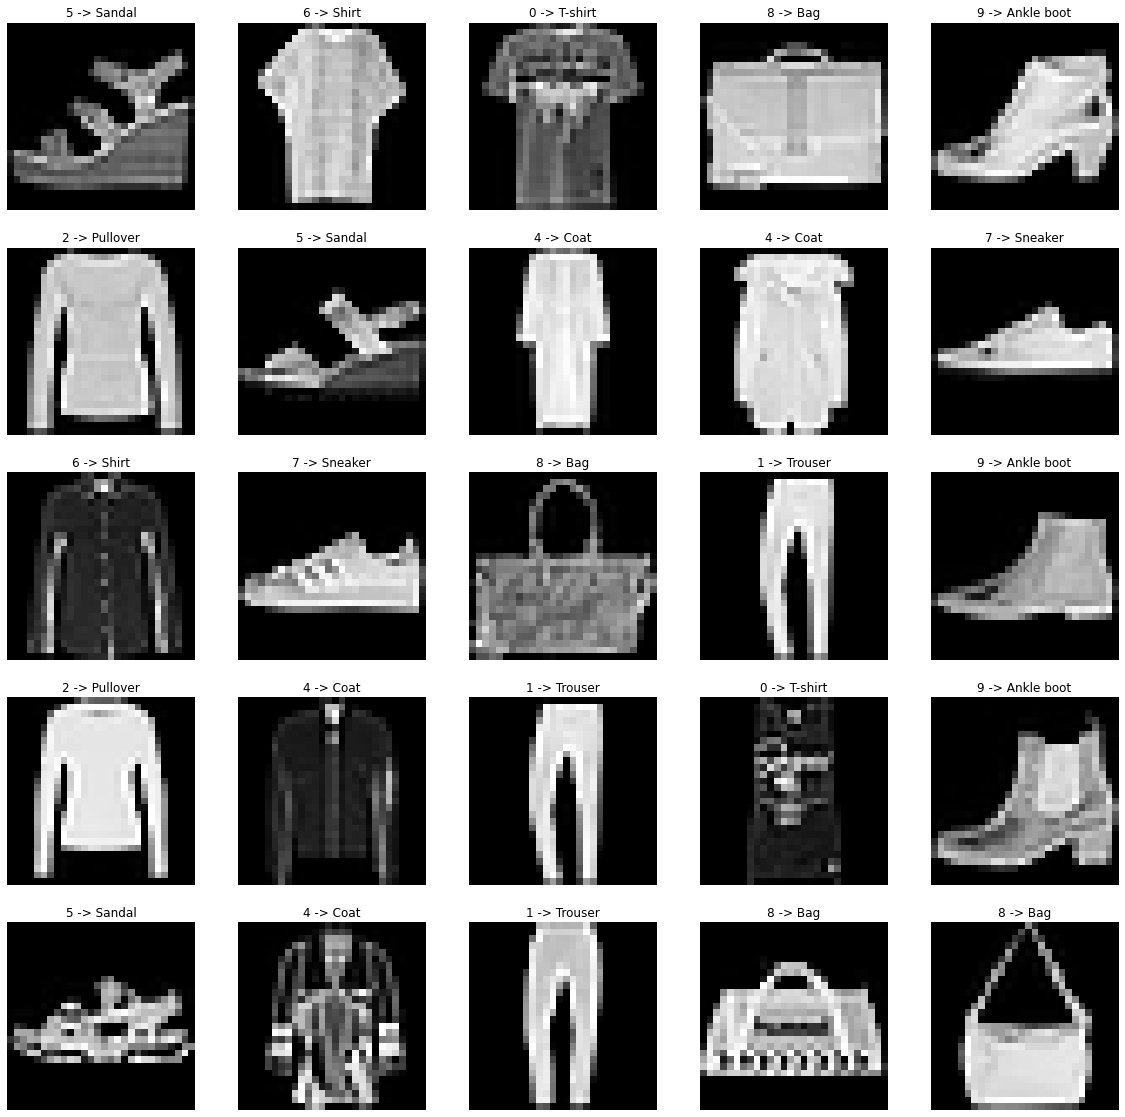

In [6]:
col = 5
row = 5
fig, ax = plt.subplots(row,col, figsize=(20,20))
indexs  = np.random.randint(0, n_test, row*col)
count   = 0
for i in range(row):
    for j in range(col):
        ax[i, j].imshow(X_test[indexs[count]], cmap='gray') 
        ax[i, j].set_title(f'{y_test[indexs[count]]} -> {classes[y_test[indexs[count]]]}')
        ax[i, j].axis(False)
        count+=1
        

<a name='2.3'></a>
#### 2.3- Adjust Data

In [7]:
(X_train,X_test) = (X_train.astype('float32')/255.0,X_test.astype('float32')/255.0)

##  3- MODEL

<a name='3.1'></a>
#### 3.1- Fully Connected Model

In [50]:
FCN = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [51]:
predict1 = tf.keras.Sequential([
        FCN,
        tf.keras.layers.Softmax()
    ])

In [56]:
FCN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
hist1 = FCN.fit(X_train, y_train, epochs=10, batch_size=64 ,validation_data=(X_test, y_test))

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5233 - accuracy: 0.8171 - val_loss: 0.4464 - val_accuracy: 0.8432
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3882 - accuracy: 0.8627 - val_loss: 0.4063 - val_accuracy: 0.8600
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3466 - accuracy: 0.8753 - val_loss: 0.3719 - val_accuracy: 0.8679
Epoch 4/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3207 - accuracy: 0.8840 - val_loss: 0.3786 - val_accuracy: 0.8647
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3024 - accuracy: 0.8899 - val_loss: 0.3704 - val_accuracy: 0.8667
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2895 - accuracy: 0.8934 - val_loss: 0.3490 - val_accuracy: 0.8721
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2751 - accuracy: 0.8993 - val_loss: 0.3402 - val_accuracy: 0.8773
Epoch 

In [58]:
FCN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.8834


[0.33757415413856506, 0.883400022983551]

In [59]:
predict(np.array([X_test[0]]))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[1.2850842e-12, 7.7953368e-09, 1.4342305e-08, 3.8057960e-12, 4.2816395e-09, 3.5689522e-05, 1.1968727e-09, 1.1283369e-03, 4.6264514e-08, 9.9883586e-01]], dtype=float32)>

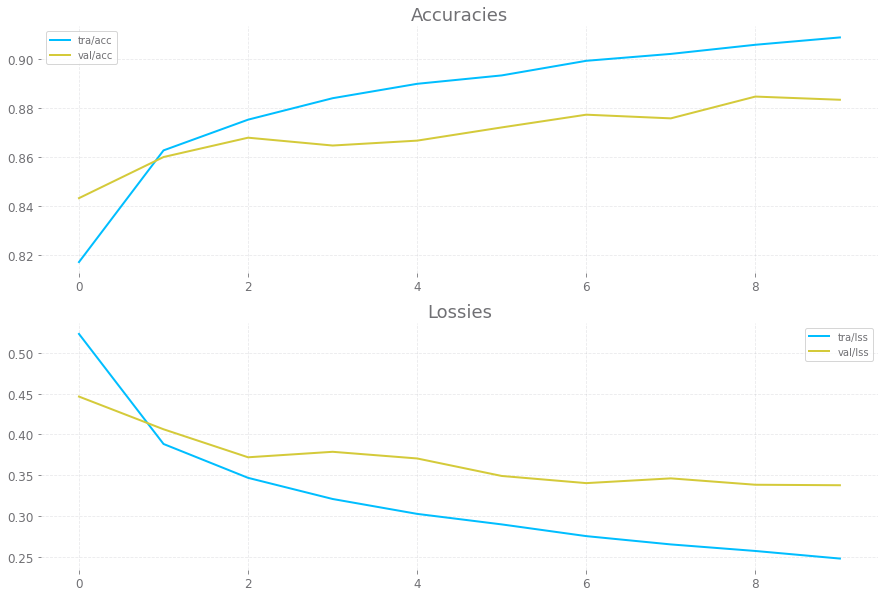

In [60]:
plt.style.use('pepso_light')
fig, ax = plt.subplots(2, 1, figsize=(15,10))
ax[0].plot(hist.history['accuracy'],label='tra/acc')
ax[0].plot(hist.history['val_accuracy'],label='val/acc')
ax[0].set_title("Accuracies")
ax[0].legend()
ax[1].plot(hist.history['loss'],label='tra/lss')
ax[1].plot(hist.history['val_loss'],label='val/lss')
ax[1].set_title("Lossies")
ax[1].legend()
plt.show()

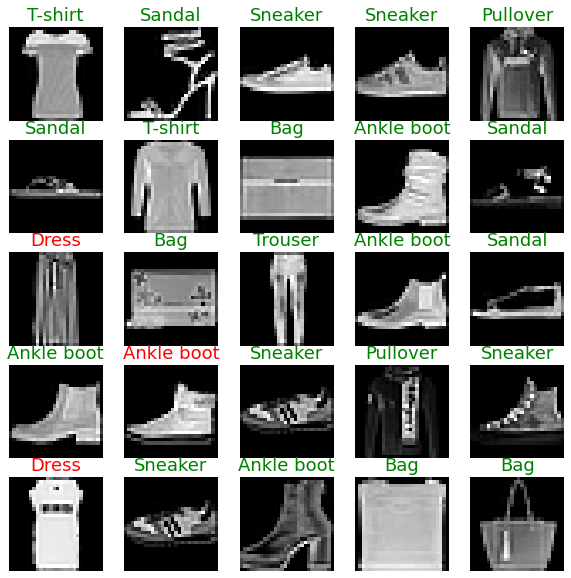

In [15]:
col = 5
row = 5
fig, ax = plt.subplots(row,col, figsize=(10,10))
indexs  = np.random.randint(0, n_test, row*col)
count   = 0
for i in range(row):
    for j in range(col):
        pred = np.argmax(predict(np.array([X_test[indexs[count]]])))
        if pred == y_test[indexs[count]] : 
            color = 'green'
        else :
            color = 'red'
        ax[i, j].imshow(X_test[indexs[count]], cmap='gray') 
        ax[i, j].set_title(f'{classes[pred]}',color=color)
        ax[i, j].axis(False)
        count+=1

In [16]:
wrong = []
for i in range(n_test):
    if np.argmax(predict(np.array([X_test[i]]))) != y_test[i]:
        wrong.append(i)

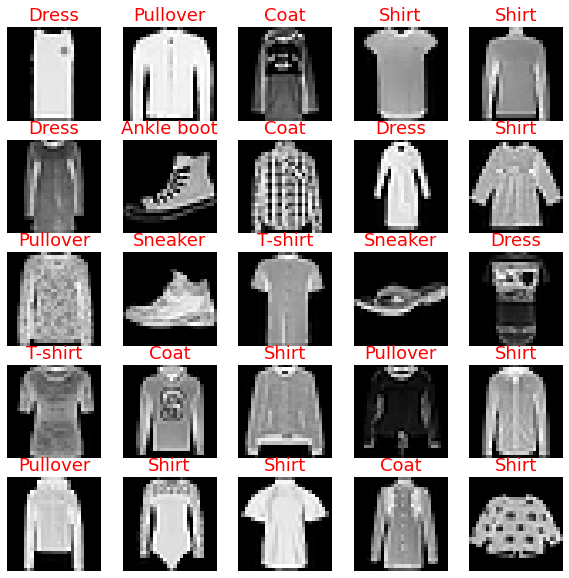

In [17]:
col = 5
row = 5
fig, ax = plt.subplots(row,col, figsize=(10,10))
indexs = np.random.choice(wrong,col*row)
count   = 0
for i in range(row):
    for j in range(col):
        pred = np.argmax(predict(np.array([X_test[indexs[count]]])))
        if pred == y_test[indexs[count]] : 
            color = 'green'
        else :
            color = 'red'
        ax[i, j].imshow(X_test[indexs[count]], cmap='gray') 
        ax[i, j].set_title(f'{classes[pred]}',color=color)
        ax[i, j].axis(False)
        count+=1

In [18]:
preds = np.argmax(predict1(X_test),axis=1)

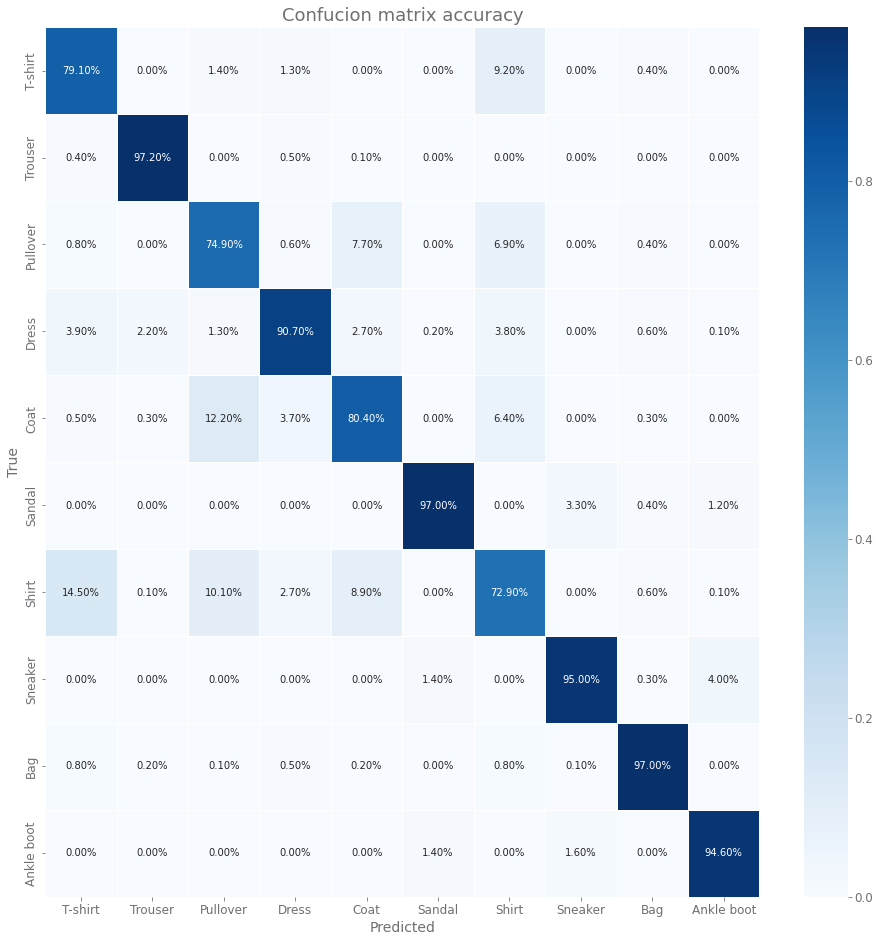

In [19]:
conf_mat = tf.math.confusion_matrix(preds,y_test).numpy()
fig,ax = plt.subplots(figsize=(16,16))
sns.heatmap(conf_mat/conf_mat.sum(axis=0),cmap = 'Blues',annot=True,fmt = '.2%',linewidth=1,ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title("Confucion matrix accuracy")
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.show()

<a name='3.2'></a>
#### 3.2- Convulational Neural Network

In [61]:
CNN = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [62]:
predict2 = tf.keras.Sequential([
        CNN,
        tf.keras.layers.Softmax()
    ])

In [65]:
CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
X_train.shape, y_train.shape, type(X_train), type(y_train)

((60000, 28, 28), (60000,), numpy.ndarray, numpy.ndarray)

In [ ]:
CNN.fit(X_train.reshape(-1,28,28,1), y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4659 - accuracy: 0.8302
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3149 - accuracy: 0.8845
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2719 - accuracy: 0.9000
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2413 - accuracy: 0.9103
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2166 - accuracy: 0.9188
Epoch 6/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.1983 - accuracy: 0.9251
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1805 - accuracy: 0.9328
Epoch 8/10
 941/1875 [==============>...............] - ETA: 32s - loss: 0.1662 - accuracy: 0.9377

In [ ]:
CNN.evaluate(X_test.reshape(-1,28,28,1), y_test)

In [ ]:
preds2 = np.argmax(predict2(X_test),axis=1)

In [ ]:
conf_mat = tf.math.confusion_matrix(preds2, y_test).numpy()
fig,ax = plt.subplots(figsize=(16,16))
sns.heatmap(conf_mat/conf_mat.sum(axis=0),cmap = 'Blues',annot=True,fmt = '.2%',linewidth=1,ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title("Confucion matrix accuracy")
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.show()